In [49]:
# train.py

import tensorflow as tf
from data.fashion_mnist_data import load_data
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = load_data()

# Build the CNN model (or another model of your choice)
def build_cnn_model():
    model = models.Sequential([

        layers.Conv2D(32, (2, 2), activation='relu',padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (2, 2),activation='relu',padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Conv2D(64, (2, 2),activation='relu',padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(64, (2, 2),activation='relu',padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(128, (2, 2), activation='relu',padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(128, (2, 2), activation='relu',padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_cnn_model()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# Save the trained model
model.save('cnn_fashion_mnist_model.h5')

# Save the training history
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7028 - loss: 0.8890 - val_accuracy: 0.8819 - val_loss: 0.3304 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8622 - loss: 0.3859 - val_accuracy: 0.8963 - val_loss: 0.2883 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8837 - loss: 0.3270 - val_accuracy: 0.9053 - val_loss: 0.2580 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8942 - loss: 0.3000 - val_accuracy: 0.8829 - val_loss: 0.3188 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9012 - loss: 0.2730 - val_accuracy: 0.9160 - val_loss: 0.2373 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9057 - loss: 0.2620 - val_accuracy: 0.9118 - val_loss: 0.2422 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.91

In [50]:
# evaluate.py

import tensorflow as tf
from data.fashion_mnist_data import load_data

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = load_data()

# Load the trained model
model = tf.keras.models.load_model('cnn_fashion_mnist_model.h5')

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 2s - 6ms/step - accuracy: 0.9402 - loss: 0.1714

Test accuracy: 0.9401999711990356


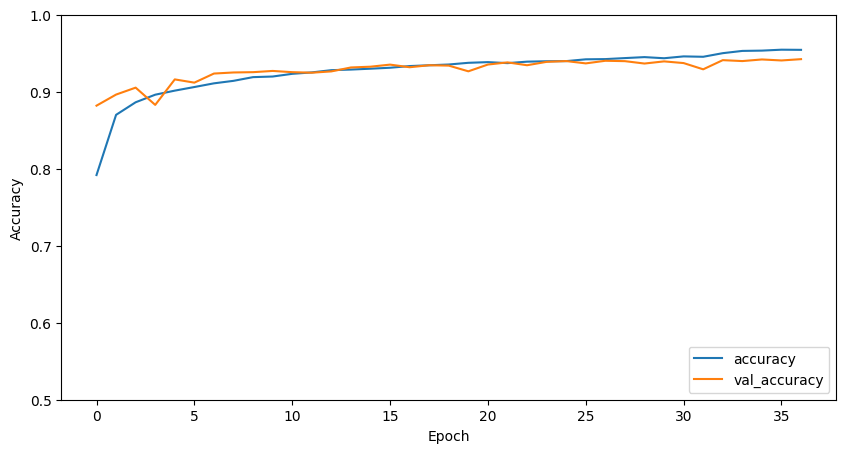

In [51]:
# utils/plot_history.py

import matplotlib.pyplot as plt
import pickle

def plot_history(history_file='history.pkl'):
    with open(history_file, 'rb') as f:
        history = pickle.load(f)

    plt.figure(figsize=(10, 5))
    plt.plot(history['accuracy'], label='accuracy')
    plt.plot(history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()

if __name__ == '__main__':
    plot_history()
